In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import numpy as np
import h5py as h5

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, get_moon, AltAz

from MeerKAT_utils.src import obs_prepare as cs
from MeerKAT_utils.src import check_data


import copy

In [15]:
s = SkyCoord(130.0 * u.deg, 25.65294 * u.deg, frame='icrs')
print s.ra.to(u.hourangle), s.dec
print s.dec + 0.5 * u.deg
print s.dec + 0.75 * u.deg
print s.dec + 0.625 * u.deg

s = SkyCoord(250.0 * u.deg, 25.65294 * u.deg, frame='icrs')
print s.ra.to(u.hourangle), s.dec

s = SkyCoord('07h41m25.7328s', '27d06m45.392s')
print s.ra.to(u.hourangle), s.dec 
print s.dec - 10.22 * u.arcmin
print s.dec - 5.11 * u.arcmin
print s.dec
print s.dec + 5.11 * u.arcmin
print s.dec + 10.22 * u.arcmin

8h40m00s 25d39m10.584s
26d09m10.584s
26d24m10.584s
26d16m40.584s
16h40m00s 25d39m10.584s
7h41m25.7328s 27d06m45.392s
26d56m32.192s
27d01m38.792s
27d06m45.392s
27d11m51.992s
27d16m58.592s


In [4]:
Abell1775 = SkyCoord("13h41.9m", "26.21d")
print Abell1775.ra.to(u.hourangle), Abell1775.dec

Abell1795 = SkyCoord("13h49.0m", "26.35d")
print Abell1795.ra.to(u.hourangle), Abell1795.dec

13h41m54s 26d12m36s
13h49m00s 26d21m00s


In [4]:
rms_K = 18./(1. * 1.e6)**0.5
rms_mJy = rms_K / 1.36 / 21.**2. * (3. * 60.) ** 2.
print rms_mJy

on = (225000000 * 4 * u.ns).to(u.s)
off =  (1788265920 * 4 * u.ns).to(u.s)
delay = (13329120 * 4 * u.ns).to(u.s)

print on, off, delay
print off + delay
print on + off

print ((1006632.96 * u.microsecond).to(u.ns) / (4. * u.ns)).value
print ((0.05 * u.s).to(u.ns) / (4. * u.ns)).value

print ((on + off).to(u.ns) / (4. * u.ns)).value
print ((1.00663296 * 8 * u.s).to(u.ns) / (4. * u.ns)).value
print ((off - 1.00663296 * 7 * u.s).to(u.ns) / (4. * u.ns)).value / 2.

0.972388955582
0.9 s 7.15306368 s 0.05331648 s
7.20638016 s
8.05306368 s
251658240.0
12500000.0
2013265920.0
2013265920.0
13329120.0


In [6]:
meerKAT_Lon = (106. + 51./60. + 24.0/3600.) * u.deg
meerKAT_Lat = (25. + 39./60. + 10.6/3600.) * u.deg
meerKAT = EarthLocation.from_geodetic(meerKAT_Lon, meerKAT_Lat)
print meerKAT.lon.deg, meerKAT.lat.deg

106.856666667 25.6529444444


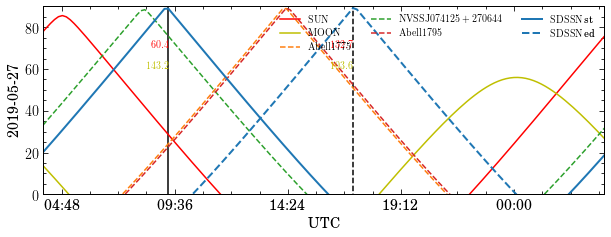

In [7]:
reload(cs)
'''
NED info:
----------------------------------------------------
BASIC DATA for LQAC 106+029 001 (NVSSJ070725+291718)
Log (Flux Density S in mJy):  2.19
Frequency                  :  4.85 GHz
Sp. Index (S=A*Freq^Index^): -0.5 
Description                :                     
Size (arcmin)              :      
----------------------------------------------------
BASIC DATA for 4C +44.15        (NVSSJ070253+443112)
Log (Flux Density S in mJy): 3.959
Frequency                  : 0.178 GHz
Sp. Index (S=A*Freq^Index^):    -1.0 
Description                :                     
Size (arcmin)              :  1.09
----------------------------------------------------
BASIC DATA for 3C 175.1
Polariazed Pmax = 15% [198OMNRAS.190. .205C]
NVSS J071404+143620
----------------------------------------------------
BASIC DATA for 4C +33.21
----------------------------------------------------
BASIC DATA for B2 0738+27 [NVSSJ074125+270644]

'''


cal_dick = {
    #'3C273' : ["12h29m06.41s", "+02d03m05.1s",   50],
    #'3C237' : [152.00 * u.deg,  7.50 * u.deg,    6.52],
    
    #'PKSB0741-063' : [116.090244 * u.deg, -6.493314 * u.deg, 7.8], # Within 10 degrees of the galactic plane h = 8.6
    #'PKS 0442+28': [71.157083 * u.deg, -28.165139 * u.deg, 10],
    #'PKS 0521-36': ['05h22m57.9846s', '-36d27m30.848s', 22.],
    #'3C 161' : ['06h27m10.117s', '-05d53m05.18s', 16.],
    #'PKS 0741-06': ['07h44m21.6s', '-06d29m36s', 10.], # spec not good at 900MHz
    #'PKS 0834-19': ['08h37m11.1s','-19d51m57s', 8.], #
    #'3C138': ['05h21m09.93s', '16d38m22.2s', '10'], # too low
    #'PicA': ['05h19m49.69s', '-45d46m44.5s', 60],
    #'3C123' : [69.268230 * u.deg, 29.670505 * u.deg, 50],
    #'PKS0408-65' : ["04h08m20.37884s", "-65d45m09.0806s", 20],
    #'PKS0438-436' : ["04h40m17.180s",  "-43d33m08.60s", 0]
    #'J1130-1449' : ["11h30m07.05s" , "-14d49m27.2s", 5.6],
    
    #'NVSSJ070725+291718': ['07h07m26.0s', '29d17m19s', 0.2658],
    #'NVSSJ070253+443112': ['07h02m53.6s', '44d31m12s', 2.3978],
    'NVSSJ074125+270644': ['07h41m25.7328s', '27d06m45.392s', 1.0],
    'Abell1775' : ['13h41m54s', '26d12m36s', 10.],
    'Abell1795' : ['13h49m00s', '26d21m00s',10],
    #'3C175.1' : ['07h14m04.7s', '14d36m22s', 2.1],
    #'4C+33.21': ['07h35m55.5660s', '33d07m09.410s', 2.41],
}

check_steps  = 600 * u.second #0.1 * u.hour
obs_speed = 5. * u.arcmin / u.second
obs_int = 2. * u.second
wgz_field = {
    'SDSS N': (130.0, 250.0,   25.65294, 25.65294),
    #'11h': (153.0, 172.0,   -1.0,    8.0),
    #'09h': (133.7, 148.8,   -1.0,    8.0),
    #'15h': (210.0, 230.0,   -3.0,    7.0),
}

obs_az_range = 18. * u.deg
obs_alt = 90.
obstime = Time('2019-5-27 4:00:00', location=meerKAT)
check_length = 1 * 24. * u.hour
obs_tot = (18./5. * 2. * 13) * u.min #1.2 * u.hour
obs_schedul_R = cs.check_schedule(obstime, check_length, meerKAT, obs_tot,
                                obs_alt, wgz_field, cal_dick, 
                                check_steps=check_steps, 
                                fcenter_shift=[[0., 0.],])

In [6]:
Abell1775 = SkyCoord("13h41.9m", "26.21d")
#ax.scatter(Abell1775.ra.deg, Abell1775.dec.deg, marker='s', s=60,
#           edgecolors='r', facecolor='none')
#_circ = circ((Abell1775.ra.deg, Abell1775.dec.deg), 45./60., 
#            facecolor='r', edgecolor='r', alpha=0.1)
#ax.add_artist(_circ)
Abell1795 = SkyCoord("13h49.0m", "26.35d")
#ax.scatter(Abell1795.ra.deg, Abell1795.dec.deg, marker='s', s=60,
#           edgecolors='b', facecolor='none')
#_circ = circ((Abell1795.ra.deg, Abell1795.dec.deg), 15./60., 
#            facecolor='b', edgecolor='b', alpha=0.1)
#ax.add_artist(_circ)

print 26.35 + 0.25
print 26.21 - 0.25

print 25.65294 + np.array([0, 0.25, 0.5, 0.75, 1.])
print 25.65294 + np.array([0, 0.25, 0.5, 0.75, 1.]) + 0.125
print 25.65294 + np.array([0, 0.25, 0.5, 0.75, 1.]) - 0.125

print
print 25.65294 + 0.5
print 25.65294 + 0.75
print 25.65294 + 0.625


s = SkyCoord()

26.6
25.96
[25.65294 25.90294 26.15294 26.40294 26.65294]
[25.77794 26.02794 26.27794 26.52794 26.77794]
[25.52794 25.77794 26.02794 26.27794 26.52794]

26.15294
26.40294
26.27794


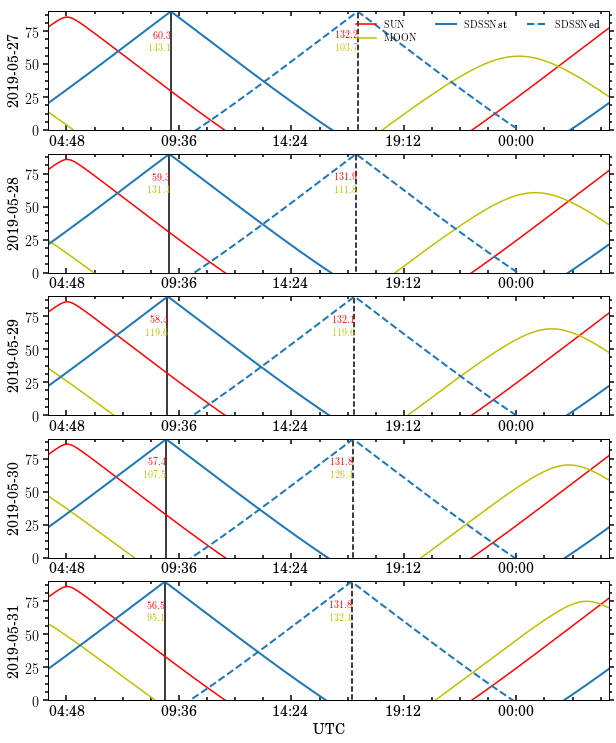

In [10]:
reload(cs)
cal_dick = {
    #'3C273' : ["12h29m06.41s", "+02d03m05.1s",   50],
    #'3C237' : [152.00 * u.deg,  7.50 * u.deg,    6.52],
    #'PKS0521-36': ['05h22m57.9846s', '-36d27m30.848s', 22.],
    #'PicA': ['05h19m49.69s', '-45d46m44.5s', 66],
    #'PKS0442-28': [71.157083 * u.deg, -28.165139 * u.deg, 10],
    #'PKS0408-65' : ["04d08m20.37884s", "-65d45m09.0806s", 20],
    #'J1130-1449' : ["11h30m07.05s" , "-14d49m27.2s", 5.6],
}

check_steps  = 100 * u.second #0.1 * u.hour
obs_speed = 5. * u.arcmin / u.second
obs_int = 2. * u.second
wgz_field = {
    'SDSS N': (130.0, 250.0,   25.65294, 25.65294),
    #'SDSS N ed': (250.0, 250.0,   25.,    26.),
    #'11h': (153.0, 172.0,   -1.0,    8.0),
    #'09h': (133.7, 148.8,   -1.0,    8.0),
    #'15h': (210.0, 230.0,   -3.0,    7.0),
}

fcenter_shift = [[0, 0.5], [0, 0.75], [0, 0.5], [0, 0.75], [0, 0.625]]

obs_az_range = 18. * u.deg
obs_alt = 90.
obstime = Time('2019-5-27 4:00:00', location=meerKAT)
check_length = 5 * 24. * u.hour
day_range = None
obs_tot = (8. * 60.) * u.min 
obs_schedul = cs.check_schedule(obstime, check_length, meerKAT, obs_tot,
                                  obs_alt, wgz_field, cal_dick, 
                                  check_steps=check_steps, 
                                  fcenter_shift=fcenter_shift,
                                  day_range = day_range)

#cs.make_obs(obs_az_range, obs_speed, obs_int, obs_schedul, 
#         wgz_field, location=meerKAT, cal=cal_dick)
#cs.check_scans(obs_az_range, obs_speed, obs_int, obs_schedul, wgz_field,
#               location=meerKAT)

In [11]:
#delta_alt = (np.arange(5) - 2.) * 15./60.
for i in range(5):
    _t1, alt1, az1, obs_time = obs_schedul['SDSS N']['R'][i]
    print "st: BJT", _t1 + 8.*u.hour, "LST", _t1.sidereal_time('apparent')
    _t2, alt2, az2, obs_time = obs_schedul['SDSS N']['S'][i]
    print "ed: BJT", _t2 + 8.*u.hour, "LST", _t2.sidereal_time('apparent')
    print "    Obs Time    : %9.3f h"%((_t2 - _t1).to(u.hour).value)
    
    if az1 > 270.: az1 -= 360.
    if az2 > 270.: az2 -= 360.
    az = (az1 + az2) / 2.
    ze = (90. - (alt1 + alt2) / 2.)
    print "    Obs Azimuth : %9.3f deg" % az
    print "    Obs Zenith  : %9.3f deg" % ze
    print

st: BJT 2019-05-27 17:15:08.200 LST 8h41m07.3944s
ed: BJT 2019-05-28 01:13:30.600 LST 16h40m48.3776s
    Obs Time    :     7.973 h
    Obs Azimuth :     0.000 deg
    Obs Zenith  :     0.448 deg

st: BJT 2019-05-28 17:11:12.400 LST 8h41m07.4998s
ed: BJT 2019-05-29 01:09:34.600 LST 16h40m48.2822s
    Obs Time    :     7.973 h
    Obs Azimuth :    -0.007 deg
    Obs Zenith  :     0.698 deg

st: BJT 2019-05-29 17:07:16.400 LST 8h41m07.404s
ed: BJT 2019-05-30 01:05:38.800 LST 16h40m48.3868s
    Obs Time    :     7.973 h
    Obs Azimuth :    -0.010 deg
    Obs Zenith  :     0.448 deg

st: BJT 2019-05-30 17:03:20.600 LST 8h41m07.5089s
ed: BJT 2019-05-31 01:01:42.800 LST 16h40m48.2915s
    Obs Time    :     7.973 h
    Obs Azimuth :    -0.014 deg
    Obs Zenith  :     0.698 deg

st: BJT 2019-05-31 16:59:24.600 LST 8h41m07.4145s
ed: BJT 2019-06-01 00:57:46.800 LST 16h40m48.1978s
    Obs Time    :     7.973 h
    Obs Azimuth :     0.018 deg
    Obs Zenith  :     0.573 deg



st: BJT 2019-05-27 17:15:08.000 LST 8h41m07.1938s
ed: BJT 2019-05-28 01:13:30.800 LST 16h40m48.5782s
    Obs Time    :     7.973 h
    Obs Azimuth :   179.929 deg
    Obs Zenith  :     0.052 deg

st: BJT 2019-05-28 17:11:12.200 LST 8h41m07.2993s
ed: BJT 2019-05-29 01:09:34.800 LST 16h40m48.4827s
    Obs Time    :     7.973 h
    Obs Azimuth :     0.002 deg
    Obs Zenith  :     0.198 deg

st: BJT 2019-05-29 17:07:16.400 LST 8h41m07.404s
ed: BJT 2019-05-30 01:05:38.800 LST 16h40m48.3868s
    Obs Time    :     7.973 h
    Obs Azimuth :    -0.010 deg
    Obs Zenith  :     0.448 deg

st: BJT 2019-05-30 17:03:20.600 LST 8h41m07.5089s
ed: BJT 2019-05-31 01:01:42.800 LST 16h40m48.2915s
    Obs Time    :     7.973 h
    Obs Azimuth :    -0.014 deg
    Obs Zenith  :     0.698 deg

st: BJT 2019-05-31 16:59:24.800 LST 8h41m07.615s
ed: BJT 2019-06-01 00:57:46.600 LST 16h40m47.9972s
    Obs Time    :     7.973 h
    Obs Azimuth :     0.007 deg
    Obs Zenith  :     0.948 deg

